
# PANDAS MANIPULATIONS,

### 0. IMPORT PACKAGES,

### 1. LOAD A DATAFRAME,

### 2. HIGH LEVEL EXPLORATION OF A DATAFRAME,

### 3. PREPARE A DATAFRAME

### 4. FILTER ROWS AND COLUMNS

### 5. AGGREGATE DATA

### 6. HOW TO REMOVE THE INDEX

### ANNEX 1: MORE TRANSFORMATIONS WITH PANDAS
### ANNEX 2: MAKE A TABLE EASY TO READ

## 0. IMPORT PACKAGES

In [26]:
# when starting a line with ! in jupyter notebook, the code is executed in the terminal instead of python
# so packages can be installed this way (uncomment the line by removing the # to actually install pandas and seaborn)
#!pip3 install pandas
#!pip3 install seaborn

In [27]:
import pandas as pd # this is a standard convention, pd is used as an alias for pandas
import seaborn as sns # seaborn is useful here because it has many example datasets

## 1. LOAD A DATAFRAME

In [28]:
# load a dataframe from seaborn
taxis = sns.load_dataset('taxis')

# in real life, data will mostly come from a database, an S3 bucket or from a csv file hosted locally or online. 
# here's how to open a csv file in pandas:
other_df = pd.read_csv("https://raw.githubusercontent.com/massardier/proj/main/rossman_store.csv")

# host a csv file on github: https://www.youtube.com/watch?v=81IoRUm_AMk&t=1s

In [29]:
# Or create a dataframe from scratch, useful to give a reproducible example when asking questions on stackoverflow 

# either by using a dictionary of columns
df = pd.DataFrame({"col1":[1,2,3],"col2":['a','b','c']})
df

,col1,col2
0,1,a
1,2,b
2,3,c


## 2. HIGH LEVEL EXPLORATION OF A DATAFRAME

In [30]:
# select the first 3 rows of a dataframe:
taxis.head(3)

# note that the outcome of the last executable row of a jupyter notebook cell is automatically printed 
# below the cell without having to use "print()"

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


In [31]:
# select the last 3 rows of a dataframe:
taxis.tail(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn
6432,2019-03-13 19:31:22,2019-03-13 19:48:02,1,3.85,15.0,3.36,0.0,20.16,green,credit card,Boerum Hill,Windsor Terrace,Brooklyn,Brooklyn


In [32]:
# Have a quick look at the statistics for each column with the method: .describe()
taxis.describe(include='all')

# for numeric values, it shows the distribution: average, median, quantiles, max, min
# for categorical values like text columns, it shows the number of unique values (unique), the most frequent (top), 
# and the frequency of the most common (freq)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000,6433,6389,6407,6388,6407,6388
unique,6414,6425,NaN,NaN,NaN,NaN,NaN,NaN,2,2,194,203,4,5
top,2019-03-13 10:57:06,2019-03-04 18:08:13,NaN,NaN,NaN,NaN,NaN,NaN,yellow,credit card,Midtown Center,Upper East Side North,Manhattan,Manhattan
freq,2,2,NaN,NaN,NaN,NaN,NaN,NaN,5451,4577,230,245,5268,5206
mean,NaN,NaN,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# General overview with the method .info()
# See the various datatypes, the non null values, the number of entries, 
# the column count and names, the total memory usage 
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB


In [34]:
# A quick way to get the number of null values by column
taxis.isna().sum() 

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

## 3. PREPARE A DATAFRAME

In [35]:
# 3.1 standardize the column names 
# (columns are already standardized for the taxi dataframe, it's here just for the example)
taxis.columns = taxis.columns.str.lower() # lower case 
taxis.columns = taxis.columns.str.replace(" ","_") # replace the spaces with an underscore

In [36]:
# 3.2 treat the time columns:
# tell python that a column must be treated as time 
taxis['pickup'] = pd.to_datetime(taxis['pickup']) #pd.to_dateime recognizes most formats spontaneously
pd.to_datetime(taxis['pickup']).dt.strftime("%Y-%m").head(3) # turn it back to string with format we indicate 
# here we use %Y-%m: Year-month):

# full list of formats: https://strftime.org/

0    2019-03
1    2019-03
2    2019-03
Name: pickup, dtype: object

In [37]:
taxis['dropoff'] = pd.to_datetime(taxis['dropoff']) 

# extract information from the time column:
taxis['pickup_date'] = taxis.pickup.dt.date # extract the date
taxis['pickup_hour'] = taxis.pickup.dt.hour # the hour
taxis['pickup_dow'] = taxis.pickup.dt.weekday # the day of week as a number
taxis['pickup_dow_name'] = taxis.pickup.dt.day_name() # the day of week as a text

taxis['ride_duration'] = taxis.dropoff - taxis.pickup # calculate the ride duration
taxis['ride_duration_in_sec1'] = taxis.ride_duration.dt.seconds

taxis[['pickup','pickup_date','pickup_hour','pickup_dow',\
       'ride_duration','ride_duration_in_sec','pickup_dow_name','pickup_dow']].head(3)

KeyError: "['ride_duration_in_sec'] not in index"

In [38]:
taxis['ride_duration_in_sec'] = taxis.ride_duration.dt.total_seconds() # same as with .dt.seconds, what's the point?

In [39]:
# Aggregate time series data 
data_per_minute = taxis[['pickup','passengers']]
data_per_minute.head()

,pickup,passengers
0,2019-03-23 20:21:09,1
1,2019-03-04 16:11:55,1
2,2019-03-27 17:53:01,1
3,2019-03-10 01:23:59,1
4,2019-03-30 13:27:42,3


In [40]:
# aggregated in bins of 15 minutes
data_per_minute\
.resample('30T', on ='pickup')\ #'M' for month, 'Q' for quarter, #'30S' for half minutes, 'D' for days
.sum().head() 

SyntaxError: unexpected character after line continuation character (3041445858.py, line 3)

In [41]:
# add a TZ
pd.to_datetime(taxis['pickup_date'])\
    .dt.tz_localize("Europe/Berlin",\ # specify the TZ
    ambiguous = 'NaT') # set NA for hours that we don't know (it's 1:30 am twice a day when we shift to winter time)

SyntaxError: unexpected character after line continuation character (1625466464.py, line 3)

In [42]:
# convert to other time zone
pd.to_datetime(taxis['pickup_date'])\
    .dt.tz_localize("Europe/Berlin")\
    .dt.tz_convert('Europe/London')

0      2019-03-22 23:00:00+00:00
1      2019-03-03 23:00:00+00:00
2      2019-03-26 23:00:00+00:00
3      2019-03-09 23:00:00+00:00
4      2019-03-29 23:00:00+00:00
                  ...           
6428   2019-03-30 23:00:00+00:00
6429   2019-03-30 23:00:00+00:00
6430   2019-03-22 23:00:00+00:00
6431   2019-03-03 23:00:00+00:00
6432   2019-03-12 23:00:00+00:00
Name: pickup_date, Length: 6433, dtype: datetime64[ns, Europe/London]

In [43]:
# 3.3 fill the missing data with something. 

# first, identify the columns with missing data
print(">>> MISSING DATA COUNT:\n", taxis.isnull().sum(axis = 0))

# second, ask: why is the data missing? do all the rows with missing data have something in common?
# for example: are all the rows without pickup_zone rides that started outside of the city?
# sometimes the fact that there is missing data is, per se, an information.

# if no time to really fix the issue, possible solutions are either:
# drop the rows with nas: 
taxis.dropna(inplace=False) # using inplace=False, because it's just an example

# or replace the NAs with the columns's most frequent value (it's called the mode).
# (for numeric variables, it is typical to use the mean or the median instead)
most_frequent_values = taxis.mode().iloc[0]
taxis.fillna(most_frequent_values, inplace = True)

print(">>> MISSING DATA COUNT AFTER FILLING:\n", taxis.isnull().sum(axis = 0))

# with more time, a regression can be used to use the pickup_zone of rows with similar fares and duration for eg.

>>> MISSING DATA COUNT:
 pickup                    0
dropoff                   0
passengers                0
distance                  0
fare                      0
tip                       0
tolls                     0
total                     0
color                     0
payment                  44
pickup_zone              26
dropoff_zone             45
pickup_borough           26
dropoff_borough          45
pickup_date               0
pickup_hour               0
pickup_dow                0
pickup_dow_name           0
ride_duration             0
ride_duration_in_sec1     0
ride_duration_in_sec      0
dtype: int64
>>> MISSING DATA COUNT AFTER FILLING:
 pickup                   0
dropoff                  0
passengers               0
distance                 0
fare                     0
tip                      0
tolls                    0
total                    0
color                    0
payment                  0
pickup_zone              0
dropoff_zone             0
pickup_boro

In [44]:
# 3.4 sort the dataframe:

# sort by pickup_zone, and then, whithin the pickup_zones, by fare
taxis.sort_values(['pickup_zone', 'fare'], ascending=[True,False]).head()[['pickup_zone','fare']]

# the ascending argument means that the pickup_zone are sorted alphabetically (ascending = True), 
# and the fares are sorted from big to small (ascending = False)

,pickup_zone,fare
5981,Allerton/Pelham Gardens,54.16
5988,Allerton/Pelham Gardens,10.50
508,Alphabet City,28.50
2944,Alphabet City,18.50
1599,Alphabet City,16.00


In [45]:
# 3.5 merge 2 dataframes

# creating 2 dataframe with a common column to make an example of merge (a zone is smaller than a borough)

rides_per_zone = taxis.groupby(['pickup_borough','pickup_zone'])['pickup'].count().rename("zone_rides").reset_index()
rides_per_borough = taxis.groupby(['pickup_borough'])['pickup'].count().rename("borough_rides").reset_index()

rides_per_zone_and_borough = rides_per_zone.merge(rides_per_borough, on =['pickup_borough'], how = 'left')

# how = 'left' means that all the rows in the left df are kept. in this example, all the borough
# in the left df are also in the right df so there will be no borough missing in the right one, but that's 
# not always the case, and using how = 'left' ensure that the rows that would contain nan are not eliminated

rides_per_zone_and_borough['zone_rides_as_share_of_borough_rides'] = rides_per_zone_and_borough.zone_rides/rides_per_zone_and_borough.borough_rides
rides_per_zone_and_borough.sort_values("zone_rides", ascending = False).head()

,pickup_borough,pickup_zone,zone_rides,borough_rides,zone_rides_as_share_of_borough_rides
120,Manhattan,Midtown Center,256,5294,0.048357
137,Manhattan,Upper East Side South,211,5294,0.039856
126,Manhattan,Penn Station/Madison Sq West,210,5294,0.039668
92,Manhattan,Clinton East,208,5294,0.039290
121,Manhattan,Midtown East,198,5294,0.037401


In [46]:
# merging trick: add suffixes that are not _x and _y to label identical columns. Eg.

# let's get 2 df with a shared column to merge on, and another identically labeled column

car_sell = pd.DataFrame({"car_id":[1,2,3],"buyer":["bob","shanon","grant"],"date":['2022-01-02','2022-01-02','2022-01-03']})
car_purchase = pd.DataFrame({"car_id":[1,2,3],"date":['2021-12-07','2021-11-21','2021-10-17']})

car_purchase_sell = car_sell.merge(car_purchase, on='car_id', suffixes=['_sell','_purchase'], indicator=True)
# indicator adds a column that says if the row was found in both tables, left_only or right_only
car_purchase_sell

,car_id,buyer,date_sell,date_purchase,_merge
0,1,bob,2022-01-02,2021-12-07,both
1,2,shanon,2022-01-02,2021-11-21,both
2,3,grant,2022-01-03,2021-10-17,both


In [47]:
# verify integrity with merge
car_sell.merge(car_purchase, on='car_id', suffixes=['_sell','_purchase'], validate='one_to_one')
# validate one_to_one ensures that the keys (car_id here) are unique in the right df


,car_id,buyer,date_sell,date_purchase
0,1,bob,2022-01-02,2021-12-07
1,2,shanon,2022-01-02,2021-11-21
2,3,grant,2022-01-03,2021-10-17


In [48]:
# merge, order, then fill na by group? (verify that)
pd.merge_ordered(car_sell,car_purchase,on=['date','car_id'],left_by='car_id',fill_method='ffill')


,car_id,buyer,date
0,1,NaN,2021-12-07
1,1,bob,2022-01-02
2,2,NaN,2021-11-21
3,2,shanon,2022-01-02
4,3,NaN,2021-10-17
5,3,grant,2022-01-03


In [49]:

squirrels_visits = pd.DataFrame({"squirrel_name":["bob","shanon","grant", "bob","shanon","grant", "bob","shanon","grant"],
                                 "date":['2022-01-02','2022-01-07','2022-01-08', '2022-01-10','2022-01-12','2022-01-15', '2022-01-17','2022-01-20','2022-01-21']})


almonds_counts = pd.DataFrame({"almonds_count":[20,19,18,16,14,13,12,8,7,6],"date":['2022-01-01','2022-01-06','2022-01-08','2022-01-09', '2022-01-11','2022-01-14','2022-01-16', '2022-01-19','2022-01-22','2022-01-23']})

squirrels_visits['date'] = pd.to_datetime(squirrels_visits['date'])
almonds_counts['date'] = pd.to_datetime(almonds_counts['date'])

squirrels_visits.sort_values("date", inplace=True)
almonds_counts.sort_values("date", inplace=True)

visits_and_almonds_count= pd.merge_asof(squirrels_visits, almonds_counts, on = 'date', direction = 'backward')


visits_and_almonds_count.rename(columns={"almonds_count":"next_almonds_count_after_visit"}, inplace=True)
visits_and_almonds_count['almonds_count_diff']=visits_and_almonds_count['next_almonds_count_after_visit'].diff()
visits_and_almonds_count

,squirrel_name,date,next_almonds_count_after_visit,almonds_count_diff
0,bob,2022-01-02,20,NaN
1,shanon,2022-01-07,19,-1.0
2,grant,2022-01-08,18,-1.0
3,bob,2022-01-10,16,-2.0
4,shanon,2022-01-12,14,-2.0
5,grant,2022-01-15,13,-1.0
6,bob,2022-01-17,12,-1.0
7,shanon,2022-01-20,8,-4.0
8,grant,2022-01-21,8,0.0


Merge on nearest period (either looking only at previous dates (backward) future dates (forward) and in both directions ('nearest')

Example: Each squirrel is allowed to pick one almond per visit. One day you realize that more
almonds disappear than squirrels visit. So you start counting the almonds every now and 
then and match it the the squirrels' visits:

![merge_asof>](mao.png)

In [50]:
# 3.6 concatenate 2 dataframes (bind them)
car_sell_jan = pd.DataFrame({"car_id":[1,2,3],"buyer":["bob","shanon","grant"],"date":['2022-01-02','2022-01-02','2022-01-03']})
car_sell_feb = pd.DataFrame({"car_id":[4,5,6],"buyer":["jen","sally","john"],"date":['2022-02-18','2022-02-22','2022-02-25']})

pd.concat([car_sell_jan,car_sell_feb], ignore_index=True).head()
# ignore_index will remove the indexes

,car_id,buyer,date
0,1,bob,2022-01-02
1,2,shanon,2022-01-02
2,3,grant,2022-01-03
3,4,jen,2022-02-18
4,5,sally,2022-02-22


In [51]:
# alternative to ignore index
pd.concat([car_sell_jan,car_sell_feb], ignore_index=False, keys=['jan','feb']).head()

car_id   buyer        date
jan 0       1     bob  2022-01-02
    1       2  shanon  2022-01-02
    2       3   grant  2022-01-03
feb 0       4     jen  2022-02-18
    1       5   sally  2022-02-22

In [52]:
# concat df with different columns names
car_sell_feb['weather']= ['sunny', 'cloudy', 'rainy']
pd.concat([car_sell_jan,car_sell_feb], ignore_index=False, join='outer').head()

# join = 'outer' keeps columns in either tables. It's the default! use 'inner' to keep only shared columns

,car_id,buyer,date,weather
0,1,bob,2022-01-02,NaN
1,2,shanon,2022-01-02,NaN
2,3,grant,2022-01-03,NaN
0,4,jen,2022-02-18,sunny
1,5,sally,2022-02-22,cloudy


In [53]:
# concat with df method: append
car_sell_jan.append(car_sell_feb).head()

/tmp/ipykernel_1290586/122422497.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  car_sell_jan.append(car_sell_feb).head()


,car_id,buyer,date,weather
0,1,bob,2022-01-02,NaN
1,2,shanon,2022-01-02,NaN
2,3,grant,2022-01-03,NaN
0,4,jen,2022-02-18,sunny
1,5,sally,2022-02-22,cloudy


In [54]:
# verify integrity with concat
try:
    pd.concat([car_sell_jan,car_sell_feb], verify_integrity=True)
except Exception as e:   
    print("ERROR RAISED!",e)

ERROR RAISED! Indexes have overlapping values: Int64Index([0, 1, 2], dtype='int64')


In [55]:
# 3.7 remove duplicates

#view them

index_of_duplicates = taxis.duplicated(subset = ['pickup'],keep=False) 
#keep false keeps both first and last occurences
taxis[index_of_duplicates].sort_values('pickup').head()[['pickup']]

,pickup
3167,2019-03-01 23:48:39
4907,2019-03-01 23:48:39
3172,2019-03-06 14:40:57
4518,2019-03-06 14:40:57
4624,2019-03-07 19:54:40


In [56]:
# remove any duplicated pickup_date
taxis.sort_values('pickup').drop_duplicates(subset = ['pickup_date'])[['pickup_date','pickup']].head()

# the argument subset allows us to deduplicate the pickup_date

,pickup_date,pickup
6203,2019-02-28,2019-02-28 23:29:03
884,2019-03-01,2019-03-01 00:03:29
1449,2019-03-02,2019-03-02 00:05:57
3841,2019-03-03,2019-03-03 00:12:50
2179,2019-03-04,2019-03-04 00:14:46


In [57]:
# 3.8 retrieve the frequency of each value in a column

taxis.pickup_hour.value_counts()
# the hour when least rides start is 5 am

18    417
19    406
17    388
20    368
14    360
21    355
16    336
12    334
15    330
10    325
22    321
9     319
13    316
8     313
23    296
11    295
7     221
0     205
6     142
1     110
2     101
3      67
4      57
5      51
Name: pickup_hour, dtype: int64

In [58]:
# 3.9 rolling average

# df1['column1'].rolling(7).mean() # get a 7 days rolling average of the values in the column1

pax_per_day = taxis.groupby('pickup_date')[['passengers']].sum()
pax_per_day['7days_avg']=pax_per_day.rolling(7).mean()
pax_per_day.head(10)

,passengers,7days_avg
pickup_date,,
2019-02-28,1,NaN
2019-03-01,370,NaN
2019-03-02,310,NaN
2019-03-03,264,NaN
2019-03-04,267,NaN
2019-03-05,382,NaN
2019-03-06,390,283.428571
2019-03-07,331,330.571429
2019-03-08,332,325.142857


In [59]:
# 3.10 something that can be very confusing: copying a dataframe

# here python creates a separate object taxi_manhattan because it is only certain rows of the dataframe taxis
taxi_manhattan = taxis.query("pickup_borough == 'Manhattan'")

taxi_manhattan2 = taxi_manhattan # this line instead doesn't make a copy of the data frame taxi_manhattan, it only
# allows to access the object taxi_manhattan with 2 different names: taxi_manhattan and taxi_manhattan2.
# for this reason it will trigger a warning

# if something is modified on taxi_manhattan2, like here
taxi_manhattan2['pickup_borough'] = 'M'
# it will be modified on taxi_manhattan as well, eg:
print("taximahattan:", taxi_manhattan.pickup_borough.unique())

taximahattan: ['M']


/tmp/ipykernel_1290586/4066759325.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_manhattan2['pickup_borough'] = 'M'


In [60]:
# in order to have python make actual copy of the dataframe, the method .copy() can be used

taxi_manhattan = taxis.query("pickup_borough == 'Manhattan'")

taxi_manhattan3 = taxi_manhattan.copy()
# taxi_manhattan3 is a separate object, stored elsewhere on the computer's disk. modifying taxi_manhattan3
# will not do anything to taxi_mahattan 

taxi_manhattan3['pickup_borough'] = 'M'
# it will be modified on taxi_manhattan as well, eg:
print("taximahattan:", taxi_manhattan.pickup_borough.unique())

taximahattan: ['Manhattan']


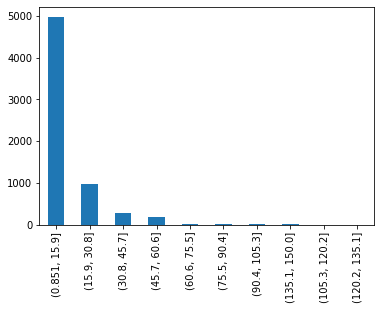

14.9


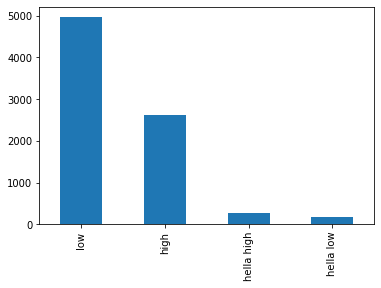

In [61]:
import matplotlib.pyplot as plt

# 3.11 Create bins, cuts, buckets of values

# go from a continuous to a categorical variable: segment a numeric variable in intervals.

# automatically split the values in the column fare in 10 blocks
pd.cut(taxis.fare,10).value_counts().plot.bar() # the size of a block is calculated as follow:

plt.show()
# the labels argument lets us give names to the cuts.
# note that cuts creates a category type of column!
pd.cut(taxis.fare,10, labels= ['a','b','c','d','e','f','g','h','i','j']).value_counts().plot.bar() # the size of a block is calculated as follow:


# instead of a number of cuts, bin ranges can be passed
import numpy as np
pd.cut(taxis.fare,bins=[-np.inf, 0,10, 50, np.inf], labels= ['hella low','low','high','hella high']).value_counts().plot.bar() 


# (highest fare - lowest fare) /100
print((taxis.fare.max()-taxis.fare.min())/10)

# The first interval has this form: (0.851, 15.9] because the first number 0.851 is included, and the last 
# number 15.9 is excluded (that's why the following interval starts with 15.9)

<AxesSubplot:>

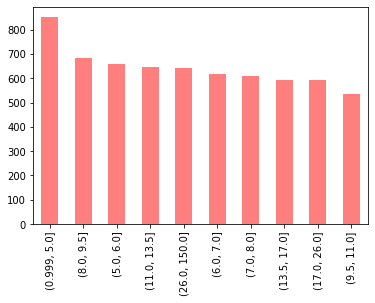

In [62]:
# automatically split the values in the column fare in 10 groups of similar size
pd.qcut(taxis.fare,10).value_counts().plot.bar(color='red',alpha=0.5)

<AxesSubplot:>

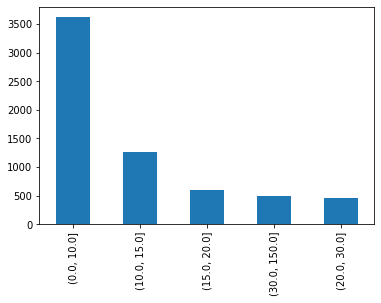

In [63]:
# create bins with intervals manually defined
my_bins = pd.IntervalIndex.from_tuples([(0,10),(10,15),(15, 20), (20, 30), (30,taxis.fare.max())])

# split the values in the column fare using my custom intervals
pd.cut(taxis.fare,my_bins).value_counts().plot.bar()


In [64]:
# 3.12 get the rank of each of the rides for each pickup_zone in terms of fare

taxis['ride_rank'] = taxis.groupby('pickup_zone').fare.rank(method = 'min', ascending=False)
# ascending = False because we want the highest fare to be ranked #1 and method = 'min' so that 2 rides
# with the same fare both obtain the same rank, the rank of the first ride found with this fare.
taxis[taxis['ride_rank']==1].head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,...,pickup_borough,dropoff_borough,pickup_date,pickup_hour,pickup_dow,pickup_dow_name,ride_duration,ride_duration_in_sec1,ride_duration_in_sec,ride_rank
162,2019-03-06 17:36:48,2019-03-06 18:43:39,2,17.10,52.0,13.10,5.76,78.66,yellow,credit card,...,Manhattan,Queens,2019-03-06,17,2,Wednesday,0 days 01:06:51,4011,4011.0,1.0
225,2019-03-22 15:36:34,2019-03-22 16:34:48,2,12.07,48.5,11.51,5.76,69.07,yellow,credit card,...,Manhattan,Brooklyn,2019-03-22,15,4,Friday,0 days 00:58:14,3494,3494.0,1.0
250,2019-03-21 10:07:48,2019-03-21 10:52:02,2,16.74,52.0,15.26,5.76,76.32,yellow,credit card,...,Manhattan,Queens,2019-03-21,10,3,Thursday,0 days 00:44:14,2654,2654.0,1.0
269,2019-03-03 21:34:24,2019-03-03 22:08:25,2,7.80,28.0,6.35,0.00,38.15,yellow,credit card,...,Manhattan,Manhattan,2019-03-03,21,6,Sunday,0 days 00:34:01,2041,2041.0,1.0
308,2019-03-18 12:54:42,2019-03-18 13:32:35,5,18.76,52.0,11.71,5.76,70.27,yellow,credit card,...,Manhattan,Queens,2019-03-18,12,0,Monday,0 days 00:37:53,2273,2273.0,1.0


In [65]:
# 3.13 calculate difference versus previous row (or following row  (-1), or 7 rows before etc.)
# can be between columns with axis =1

pax_per_day['pax_vs_prev']=pax_per_day['passengers'].diff(periods = 1)
pax_per_day.tail()

,passengers,7days_avg,pax_vs_prev
pickup_date,,,
2019-03-27,352,301.714286,86.0
2019-03-28,327,302.714286,-25.0
2019-03-29,312,297.571429,-15.0
2019-03-30,359,300.285714,47.0
2019-03-31,296,306.571429,-63.0


In [66]:
# 3.13 other useful pandas function

# df.apply(lambda row: row['column1']*row['column2']) # apply a function to a pandas row
# df['column1'].apply(lambda x: x**2) # apply a function to a pandas column

# df.sample(100) # randomly select x rows of a dataframe

# df['column1'].map({'cat': 'kitten', 'dog': 'puppy'}) # replace the content in the cells using the mapping provided

# pd.Series(['cat','dog','pinguin']).replace(['cat','dog'], 'animal') # replace several values by the same 
# pd.Series(['cat','dog','pinguin']).replace({"cat":"kitten","dog":"puppy"}) # map different values
# pd.Series(['jan','feb','jun']).replace({"jan":"winter","feb":"winter","jun":"summer"}) # map different values

# df.drop(labels=['test'], axis=1) #delete the columns in the list

# df.sum() # sums across rows (with axis = 0) or across columns (with axis = 1)

# df['rev'].shift(1) # shit the value by 1 row (the first value will be NaN)


# string manip : remove leading/trailing characters ($ for ex) with .str.strip("$")
# string manip: replace reg expression with .str.replace('r\D+') # eliminate anything that is not a digit

# string comparison
from thefuzz import process, fuzz
fuzz.WRatio("Julien M.","M. Julian") #lowest = 0 max =100 
#different ordering is ok

/home/julien.massardier/.local/lib/python3.8/site-packages/thefuzz/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


84

In [67]:
# get the similarity score
possible_spellings = ['jul','Julien','julian','julio','giulien']

process.extract("Julien", possible_spellings, limit =len(possible_spellings))
# if limit is as long as choices, all matches are returned


[('Julien', 100), ('jul', 90), ('julian', 83), ('giulien', 77), ('julio', 73)]

In [68]:
# correct misspellings in df
for cuisine in categories:  
  # Create a list of matches, comparing cuisine with the cuisine_type column
  matches = process.extract(cuisine, restaurants['cuisine_type'], limit=len(restaurants.cuisine_type))

  # Iterate through the list of matches
  for match in matches:
     # Check whether the similarity score is greater than or equal to 80
    if match[1] >= 80:
      # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
      restaurants.loc[restaurants['cuisine_type'] == match[0]] = cuisine
      

NameError: name 'categories' is not defined

In [69]:
# record Linkage:

#when the column on which to merge is not exactly the same: link on the most similar
import pandas as pd
import recordlinkage

# blocking: reduce possible pairs by using share column (ex: addresses similar between 2 datasets but city is standard)
# we block on the city and search pairs within each city

df1 = pd.DataFrame({"address":["worther str 20","Friedrichstrasse 44","Worfer str. 20"],
                   "city":["berlin","berlin","hamburg"]})

df2 = pd.DataFrame({"address":["Karl Marx Allee 129", "woerfer str 20", "woerther strasse 20"],
                   "city":["berlin","hamburg","berlin"]})


# first create an indexer:
indexer = recordlinkage.Index()
indexer.block('city')

# create pairs
pairs = indexer.index(df1, df2)

# compare
comp = recordlinkage.Compare()
comp.exact('city','city', label = 'city')
comp.string('address','address',threshold=0.7, label='address')

possible_matches = comp.compute(pairs, df1,df2)

# matches on both columns:
matches = possible_matches[possible_matches.sum(axis=1)==2]
duplicated_rows = matches.index.get_level_values(1)


# unique addresses
pd.concat([df1,df2.drop(duplicated_rows)])

,address,city
0,worther str 20,berlin
1,Friedrichstrasse 44,berlin
2,Worfer str. 20,hamburg
0,Karl Marx Allee 129,berlin


In [70]:
matches.index()

TypeError: 'MultiIndex' object is not callable

In [71]:
! pip install recordlinkage

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


## 4. FILTER ROWS AND COLUMNS

Filtering is also called indexing. There are 3 types of indexing:
* condition-based: use a boolean list or series to indicate which rows or columns to include
* label-based: use the row names (aka: the index) or the columns names to indicate which rows or columns to include
* integer-based: use numbers to indicate the position of the rows or columns to include


### 4.1 Summary of how to select rows and columns in a dataframe:

![indexing summary>](indexing_summary.png)


### 4.2 Filtering with df[ ]

Filtering is done by using square brackets [] after the dataframe's name. One can use either an individual value `df['col1']` which returns a series or a list of values `df[['col1','col2']]` which returns a dataframe. One can return a dataframe with one column instead of a series using a list of column names with only 1 name: `df[['col1']]`.



The object between the brackets determines what will be filtered:
* string or integer = columns are filtered, by label
* boolean = rows are filtered, by condition
* slice = rows are filtered, by location

In [72]:
# example df with very obvious names for columns and rows
df = pd.DataFrame({"col1":[1,2,3],"col2":['a','b','c']},
                  index=['row1','row2','row3'])
df

,col1,col2
row1,1,a
row2,2,b
row3,3,c


In [73]:
# filter rows with a condition
df[df.col1>1]

,col1,col2
row2,2,b
row3,3,c


In [74]:
# filter columns with a label
df[['col1']]

,col1
row1,1
row2,2
row3,3


In [75]:
# note that by filtering with just a string and not a list of strings like above, the object returned is a series, 
# not a dataframe. This is true for .loc[] as well
df['col1']

row1    1
row2    2
row3    3
Name: col1, dtype: int64

In [76]:
# filter rows by position, let's use the slice 0:2 which selected rows 0 and 1 (as the number after the column
# is excluded from the selection
df[0:2]

,col1,col2
row1,1,a
row2,2,b


### 4.3 Filtering with df.loc[ ]

It's a dataframe method but it uses square brackets [] instead of round ones () like the other methods. The reason is probably that it is a method made for indexing and indexing was otherwise made with [] (for lists for example).

The position (before or after the comma between the brackets) determines what will be filtered:
* before the comma: rows are filtered
* after the comma: columns are by filtered
* no comma: rows are filtered 

To include all the rows and filter only columns, use `:` before the comma.<br>
To include all the columns and filter only rows, use `:` after the comma, or just don't use a comma

Whether the filter is based on condition or labels is determined by the object used: boolean or not
With `.loc[]`, one can now also filter rows by label, and columns by condition, which is not possible when indexing with `df[]`.

Other reasons to love .iloc[]:

* Because of the structure with the comma, it allows to filter both rows and columns at same time. For example: `dataframe.loc[condition_boolean,list_of_column_names]`
* It allows to modify the values in the dataframe, while indexing with `df[]` doesn't work for that (see 4.5)



In [77]:
# filter rows with a condition (very similar to when just using df[])
df.loc[df.col1>1]

,col1,col2
row2,2,b
row3,3,c


In [78]:
# filter rows with a label
df.loc[['row1']]

,col1,col2
row1,1,a


In [79]:
# filter columns with a condition
cond_cols = df.columns.str.contains('2')

df.loc[:,cond_cols]

,col2
row1,a
row2,b
row3,c


In [80]:
# filter columns with a label

df.loc[:,['col1']]

,col1
row1,1
row2,2
row3,3


In [81]:
# filter rows and columns at the same time:

df.loc[df.col1>1,['col2']]

,col2
row2,b
row3,c



### 4.4 Filtering with df.iloc[ ]

Same as df.loc[] but this time integers and slices are used to indicate the position of the rows to include

In [82]:
# filter rows by position
df.iloc[[0]]

,col1,col2
row1,1,a


In [83]:
# here as well, slices can be used:
df.iloc[:,0:1]

,col1
row1,1
row2,2
row3,3


In [84]:
# here as well, using just one integer and not a list of integers will return a series:
df.iloc[:,0]

row1    1
row2    2
row3    3
Name: col1, dtype: int64

In [85]:
# .iloc[] is often used to extract an individual value from a dataframe
df.iloc[1,1]

'b'

In [86]:
# filter columns by position
df.iloc[:,[0]]

,col1
row1,1
row2,2
row3,3


### 4.5 Why indexing with .loc[] is better

It allows to <b>modify the content of the dataframe</b> for some specific rows. 

For example if there is an extra fee of $3 for any ride coming from an airport but it was not included in the data, it can be corrected with `.loc[]`

In [87]:
# 1. create a mask for the rows that contain the word airport or Airport
mask_ride_from_airport = taxis.pickup_zone.str.lower().str.contains('[Aa]irport').fillna(False)

# 2. check that the mask pics up the right rows
print(taxis[mask_ride_from_airport].pickup_zone.unique())

# 3. show that it doesn't work with the df[] construction: add $3 to these rows
print("avg fare before correction",taxis[mask_ride_from_airport]['fare'].mean().round(2))

taxis[mask_ride_from_airport]['fare'] += 3

#proof that it didn't work.
print("avg fare after correction with df[] is the same",taxis[mask_ride_from_airport]['fare'].mean().round(2))

#The warning below recommends to use .loc[] instead, with good reason:

['LaGuardia Airport' 'JFK Airport']
avg fare before correction 37.61
avg fare after correction with df[] is the same 37.61


/tmp/ipykernel_1290586/1912547102.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxis[mask_ride_from_airport]['fare'] += 3


In [88]:
# with .loc[] it works without problem
taxis.loc[mask_ride_from_airport,'fare'] += 3 

print("avg fare after correction with df.loc[] has the extra $3",taxis[mask_ride_from_airport]['fare'].mean().round(2))

avg fare after correction with df.loc[] has the extra $3 40.61


### 4.6 Filtering with the .query() method

The quickest way to filter the rows of a dataframe based on a condition: the .query() method. It always returns a dataframe

In [89]:
df.query("col1 >1 and (col2 == 'b' or col2 == 'c')")

,col1,col2
row2,2,b
row3,3,c


In [90]:
df.query("col2 in ['b','c']")

,col1,col2
row2,2,b
row3,3,c


### 4.7 Use masks like a true engineer

Masks is a name for the booleans used to filter a dataframe. The idea is to create them separately before applying them, and giving them an explicit name. They are called "masks" because they hide part of the data and leave the rest visible (like the old masks that covered only the upper half of the face and not the bottom half).

Why it's a good idea:

* It makes the code look more professional as it becomes more structured and easier to read by others
* It allows to re-use the masks later in the code and combine various booleans in different ways

In [91]:
long_distance_mask = (taxis.distance > 20)
short_distance_mask = (taxis.distance < 2)

# they can be combined (note that adding ~ in front of a boolean returns the opposite of the boolean)
# this is neither long distance nor short
medium_distance_taxis_rides = taxis.loc[~long_distance_mask & ~short_distance_mask] 
# the proof:
medium_distance_taxis_rides.distance.describe()[['min','max']]

min     2.00
max    19.99
Name: distance, dtype: float64

## 5. AGGREGATE DATA

Example:
* number of passengers who traveled per day
* the distance they covered in total
* the distance they covered on average

How a .groupby() method works:

![groupby2>](groupby2.png)

In [92]:
# Group by with a single aggregation function (here, the sum) applied to 2 columns
taxis.groupby(['pickup_date'])[['passengers','distance']].sum().head(3)

,passengers,distance
pickup_date,,
2019-02-28,1,0.90
2019-03-01,370,640.29
2019-03-02,310,548.70


In [93]:
# Group by with different functions for different columns

# 1. make a dictionary that contains the columns to process and the functions to be applied to each of them:
aggregation_dict = {"passengers":"sum","distance":["sum","mean"]}

# 2. use it in the groupby call
simplified_taxis = taxis.groupby(['pickup_date']).agg(aggregation_dict)

simplified_taxis.head(3)

passengers distance          
                   sum      sum      mean
pickup_date                              
2019-02-28           1     0.90  0.900000
2019-03-01         370   640.29  2.656805
2019-03-02         310   548.70  2.771212

## 6. HOW TO REMOVE THE INDEX

In [94]:
# Several pandas functions turn columns into indices.

# In the previous aggregation, given that there are 2 functions for "distance": sum and mean, pandas created a 
# column multi-index (2 layers, one for the metric, one for the function) and accessing the columns by 
# name becomes tricky. 
print("a multi index with 2 levels is made of a list of pairs:\n\n",
      simplified_taxis.columns)

# Here's how to flatten a column multi-index:

simplified_taxis.columns = ["__".join(pair) for pair in simplified_taxis.columns]
# 2 underscores are inserted between the metric name (passengers, distance) and the function name (sum, mean)

simplified_taxis.head(3)

a multi index with 2 levels is made of a list of pairs:

 MultiIndex([('passengers',  'sum'),
            (  'distance',  'sum'),
            (  'distance', 'mean')],
           )


,passengers__sum,distance__sum,distance__mean
pickup_date,,,
2019-02-28,1,0.90,0.900000
2019-03-01,370,640.29,2.656805
2019-03-02,310,548.70,2.771212


In [95]:
# Any column inside the groupby() function will become an index. 

# Here's how to turn row indices back into columns:
simplified_taxis.reset_index(inplace=True)
simplified_taxis.head(3)

,pickup_date,passengers__sum,distance__sum,distance__mean
0,2019-02-28,1,0.90,0.900000
1,2019-03-01,370,640.29,2.656805
2,2019-03-02,310,548.70,2.771212


In [96]:
# get values from 1 index only in multi index df:
multi_index_df = taxis.groupby(['pickup','color'])[['fare']].mean()
multi_index_df.index.get_level_values('color')

Index(['green', 'yellow', 'yellow', 'yellow', 'yellow', 'green', 'yellow',
       'yellow', 'yellow', 'yellow',
       ...
       'yellow', 'yellow', 'green', 'green', 'yellow', 'yellow', 'yellow',
       'yellow', 'yellow', 'yellow'],
      dtype='object', name='color', length=6421)

In [97]:
# or by position:
multi_index_df.index.get_level_values(0)

DatetimeIndex(['2019-02-28 23:29:03', '2019-03-01 00:03:29',
               '2019-03-01 00:08:32', '2019-03-01 00:15:53',
               '2019-03-01 00:29:22', '2019-03-01 00:30:59',
               '2019-03-01 00:32:49', '2019-03-01 00:53:00',
               '2019-03-01 00:56:50', '2019-03-01 01:25:30',
               ...
               '2019-03-31 21:27:22', '2019-03-31 21:35:29',
               '2019-03-31 21:40:28', '2019-03-31 21:55:23',
               '2019-03-31 22:07:15', '2019-03-31 22:13:37',
               '2019-03-31 22:32:27', '2019-03-31 22:51:53',
               '2019-03-31 23:15:03', '2019-03-31 23:43:45'],
              dtype='datetime64[ns]', name='pickup', length=6421, freq=None)

## ANNEX 1: MORE TRANSFORMATIONS WITH PANDAS

![long to wide>](long_to_wide.png)

In [98]:
# quick solution with unstack for simple use cases
simplified_taxis_easy = taxis.groupby(['pickup_date','color'])[['passengers','distance','tip']].sum()
simplified_taxis_easy[['distance','tip']].unstack('color')

distance            tip        
color          green  yellow  green  yellow
pickup_date                                
2019-02-28      0.90     NaN   0.00     NaN
2019-03-01    155.27  485.02  32.08  410.39
2019-03-02     69.31  479.39  19.57  314.40
2019-03-03    127.43  426.61  40.73  266.74
2019-03-04     91.45  492.36   8.70  326.28
2019-03-05    191.18  525.45  14.57  416.61
2019-03-06    148.27  568.59  34.95  494.41
2019-03-07    111.50  525.51  30.60  406.64
2019-03-08     90.20  638.19  20.72  460.86
2019-03-09     84.94  578.05  21.21  350.58
2019-03-10     78.60  441.80  15.27  320.89
2019-03-11     99.63  560.24   8.32  392.58
2019-03-12     92.02  462.26  18.75  427.18
2019-03-13    108.12  705.07  38.96  495.60
2019-03-14    165.41  580.75  25.55  481.83
2019-03-15    117.20  547.68  31.16  416.44
2019-03-16    115.20  541.04  21.97  374.49
2019-03-17    108.62  515.63  39.59  337.07
2019-03-18     60.93  491.25  26.75  357.50
2019-03-19    104.78  555.61   1.06  389.65
2019-03-20    135.86  635.17  38.22  428.59
2019-03-21     97.63  625.68  20.68  496.52
2019-03-22    119.48  543.57  28.98  397.06
2019-03-23    117.65  393.77  13.77  294.68
2019-03-24     74.10  359.81  20.99  269.65
2019-03-25     92.01  403.70  25.25  289.96
2019-03-26     56.37  489.06  11.96  371.35
2019-03-27    105.11  632.84  27.72  457.91
2019-03-28     90.23  522.71  22.94  381.51
2019-03-29     70.70  486.03  29.91  380.22
2019-03-30    146.45  521.65  52.63  435.34
2019-03-31    119.40  376.92  37.58  308.25

In [99]:
simplified_taxis = taxis.groupby(['pickup_date','color','payment'])[['passengers','distance','tip']].sum()
simplified_taxis.reset_index(inplace=True)
simplified_taxis.head(3)

,pickup_date,color,payment,passengers,distance,tip
0,2019-02-28,green,cash,1,0.90,0.00
1,2019-03-01,green,cash,28,30.23,0.00
2,2019-03-01,green,credit card,35,125.04,32.08


In [100]:
simplified_taxis_wide = pd.pivot_table(data=simplified_taxis,
                                       index = ['pickup_date'], # the columns of the row index
                                       columns = ['payment','color'], #the columns whose data will become column name
                                       values=['passengers','tip'], #the columns whose data is numeric and will be aggegrated
                                       aggfunc='sum', # agg funct (default = sum)
                                       fill_value="no data", #what to fill missing cases with
                                       margins=True # add rows and cols totals?
                                      )

# remove the multi index
simplified_taxis_wide.columns = ["__".join(reversed(pair)).replace(" ","_").lower() for pair in simplified_taxis_wide.columns]

simplified_taxis_wide.tail()

,green__cash__passengers,yellow__cash__passengers,green__credit_card__passengers,yellow__credit_card__passengers,__all__passengers,green__cash__tip,yellow__cash__tip,green__credit_card__tip,yellow__credit_card__tip,__all__tip
pickup_date,,,,,,,,,,
2019-03-28,16.0,83.0,23.0,205.0,327,0.0,0.0,22.94,381.51,404.45
2019-03-29,14.0,86.0,13.0,199.0,312,0.0,0.0,29.91,380.22,410.13
2019-03-30,12.0,76.0,32.0,239.0,359,0.0,0.0,52.63,435.34,487.97
2019-03-31,20.0,73.0,27.0,176.0,296,0.0,0.0,37.58,308.25,345.83
All,528.0,2285.0,698.0,6391.0,9902,0.0,0.0,781.14,11951.18,12732.32


![wide_to_long>](wide_to_long.png)

In [101]:
simplified_taxis_long = pd.melt(simplified_taxis_wide.reset_index(), 
        id_vars=['pickup_date'], 
        value_vars=['green__cash__passengers', 'yellow__cash__passengers'])

simplified_taxis_long.head()

,pickup_date,variable,value
0,2019-02-28,green__cash__passengers,1.0
1,2019-03-01,green__cash__passengers,28.0
2,2019-03-02,green__cash__passengers,18.0
3,2019-03-03,green__cash__passengers,19.0
4,2019-03-04,green__cash__passengers,15.0


In [105]:
# split the values in the 'variable' column into several columns:

simplified_taxis_long[['color','payment','value_type']]=simplified_taxis_long['variable'].str.split('__', expand=True)

simplified_taxis_long.head(3)

,pickup_date,variable,value,color,payment,value_type
0,2019-02-28,green__cash__passengers,1.0,green,cash,passengers
1,2019-03-01,green__cash__passengers,28.0,green,cash,passengers
2,2019-03-02,green__cash__passengers,18.0,green,cash,passengers


In [110]:
# split and keep only one of the values (here we keep the 1st)
simplified_taxis_long['variable'].str.split('__').str[0]

0      green
1      green
2      green
3      green
4      green
       ...  
61    yellow
62    yellow
63    yellow
64    yellow
65    yellow
Name: variable, Length: 66, dtype: object

## ANNEX 2: MAKE THE TABLE EASY TO READ

In [103]:
# a styler allows to format a dataframe to make it nicer to view on a notebook

taxis

simplified_taxis = taxis.groupby(['pickup_date']).agg({"passengers":"sum","distance":"mean","fare":"mean"})

simplified_taxis_short = simplified_taxis.tail(10).copy()

# rename columns to ensure that anyone can understand what data is presented,
# even if it's the first time they see it.
simplified_taxis_short.rename(columns = {"distance":"avg_distance_in_km","fare":"avg_fare"}, inplace=True)

# list of common format for styled tables. dec means decimals.
format_dict = {"percentage2dec":"{:.2%}",
              "percentage0dec":"{:.0%}",
              "dollar2dec":'${:,.2f}',
              "euro2dec":'{:,.2f}€',
              "number2dec":"{:.2f}"}

s = simplified_taxis_short.style
s = s.format({"avg_distance_in_km":format_dict["number2dec"],"avg_fare":format_dict["dollar2dec"]}) # let's keep only 2 decimals for distance and fare
s.bar(subset=['avg_distance_in_km'], align= 'left', color=['red','steelblue']) # the red color is in case there are negatives
s.bar(subset=['avg_fare'], align= 'left', color=['red','goldenrod'])
s

# the rows without bars are the ones with the smallest numbers. align = 'mid' would change that

,passengers,avg_distance_in_km,avg_fare
pickup_date,,,
2019-03-22,348,2.90,$13.28
2019-03-23,340,2.45,$11.46
2019-03-24,252,2.91,$12.40
2019-03-25,234,3.20,$13.04
2019-03-26,266,3.06,$13.20
2019-03-27,352,3.18,$13.64
2019-03-28,327,2.99,$13.61
2019-03-29,312,2.66,$12.75
2019-03-30,359,3.11,$13.10


In [ ]:
for index, row_as_pd_series in taxis.head().iterrows():
    print(index, row_as_pd_series['dropoff_zone'])

In [ ]:
for named_tuple in taxis.head().itertuples(): # much faster than previous!
    print(named_tuple.dropoff_zone)

In [ ]:
# categorical columns: treat a column like an R programming factor
pd.Series([1,1,1,2,2,3,4]).astype("category")

In [ ]:
# finding inconsistent data illegal values

my_values = ['A+', 'A-', 'B+', 'C-']
possible_values = ['A+','A-','B+','B-']

set(my_values).intersection(possible_values) # shared values

In [ ]:
set(my_values).difference(possible_values) # illegal values!